In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)

In [13]:
def generate_data(n):
    d = 100
    w = np.zeros(d)
    for i in range(0,10):
        w[i] = 1.0
    x0 = np.ones((n,1))
    trainx = np.random.normal(size=(n,d))
    e = np.random.random(size=(n))
    trainy = np.dot(trainx, w) + e
    trainx =np.concatenate((x0,trainx), axis=1)
    
    return trainx, trainy

In [14]:
train_x, train_y = generate_data(200)
print(train_x.shape, train_y.shape)

(200, 101) (200,)


In [3]:
y = [10,20,30,40]
x = [[1,2],[3,4],[5,6],[7,8]]
w = [2,3]
c1 = np.matmul(x,w)
c2 = np.square(c1)
c3 = np.square(y-np.matmul(x,w))
print(np.matmul(x,w))
print(y-np.matmul(x,w))
print(np.square(y-np.matmul(x,w)))
print(sum(np.square(y-np.matmul(x,w))))

[ 8 18 28 38]
[2 2 2 2]
[4 4 4 4]
16


In [30]:
def cal_loss(x,y,w,C):
    loss_no_reg = sum(np.square(y-np.matmul(x,w)))
    adjust = C * np.dot(w,w)
    loss = loss_no_reg + adjust
    return loss

In [34]:
def grad_des(x,y,w,C):
    grad = np.zeros(len(w))
    r = y - np.matmul(x,w)
    for i in range(len(w)):
        grad[i] = -2*(np.dot(r,x[:,i])) 
    temp = grad[0]
    grad = grad + 2*C*w
    grad[0] = temp
    return grad

In [46]:
def ridge_regression_GD(x,y,C):
    w = np.zeros(x.shape[1])
    step = 0.001
    num_iter = 1000
    losses = np.zeros(num_iter)
    tol = 2**(-20)
    i = 0
    loss = 100000
    while ((loss > tol) and (i < num_iter)):
        grad = grad_des(x,y,w,C)
        w = w - step * grad
        loss = cal_loss(x,y,w,C)
        losses[i] = loss
        if (loss < losses[i-1]):
            # increase the step size
            step = 2 * step
        else:
            step = 0.5 * step
        i = i+1
    return w[1:], w[0], losses

In [47]:
n = 200
x,y = generate_data(n)
C = 1.0
w,b,losses = ridge_regression_GD(x,y,C)
print('w = ', w[0:20])
print('losses = ', losses[:50])

w =  [ 9.87580636e-01  1.03708141e+00  1.00002807e+00  9.44152968e-01
  9.73003511e-01  9.71965291e-01  9.65423434e-01  1.01653816e+00
  1.00946806e+00  9.79449429e-01 -2.96929381e-02 -4.13011623e-02
  2.69311119e-02  1.50398212e-02 -6.14480442e-03 -7.26375357e-03
 -7.36919708e-03  3.74986138e-03  6.69773967e-04 -7.12038187e-03]
losses =  [544.9214637  392.84999487 214.92826696  82.17810194  32.50930189
  63.3545494  446.58462879 699.96714796  36.90775528  48.88180911
  19.97002576  20.40426967  19.07853021  19.01566543  19.5826979
  20.10646239  18.78477323  18.77467622  19.4368801   20.0009356
  18.66182295  18.67281164  18.60637351  18.59554518  18.6080903
  18.62844419  18.56441983  18.56033919  18.58436002  18.60921572
  18.54550271  18.5444581   18.57405492  18.60129237  18.5369477
  18.53729828  18.53385066  18.53308934  18.5331075   18.53411172
  18.53086774  18.53059105  18.53141906  18.53273828  18.52955041
  18.52949512  18.53070907  18.53218822  18.52898796  18.52903328]


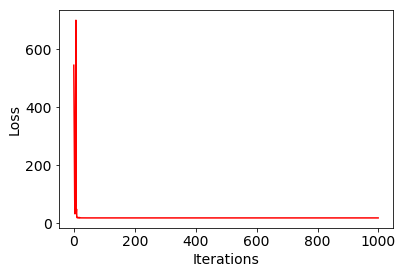

In [48]:
plt.plot(losses, 'r')
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.show()

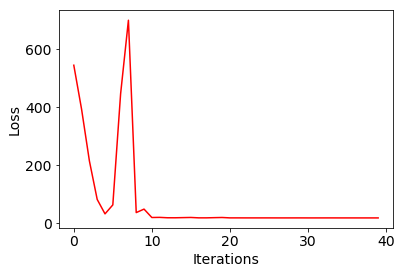

In [49]:
plt.plot(losses[:40], 'r')
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.show()

In [53]:
losses[0:50]

array([544.9214637 , 392.84999487, 214.92826696,  82.17810194,
        32.50930189,  63.3545494 , 446.58462879, 699.96714796,
        36.90775528,  48.88180911,  19.97002576,  20.40426967,
        19.07853021,  19.01566543,  19.5826979 ,  20.10646239,
        18.78477323,  18.77467622,  19.4368801 ,  20.0009356 ,
        18.66182295,  18.67281164,  18.60637351,  18.59554518,
        18.6080903 ,  18.62844419,  18.56441983,  18.56033919,
        18.58436002,  18.60921572,  18.54550271,  18.5444581 ,
        18.57405492,  18.60129237,  18.5369477 ,  18.53729828,
        18.53385066,  18.53308934,  18.5331075 ,  18.53411172,
        18.53086774,  18.53059105,  18.53141906,  18.53273828,
        18.52955041,  18.52949512,  18.53070907,  18.53218822,
        18.52898796,  18.52903328])

In [54]:
2**(-20)

9.5367431640625e-07

In [62]:
def compute_mse(w,b,x,y,n):
    residuals = y - (np.dot(x,w)+b)
    return np.dot(residuals,residuals)/n

In [64]:
n = 200
x,y = generate_data(n)
C = 1.0
w,b,losses = ridge_regression_GD(x,y,C)

x_data = x[:,1:]
regr = linear_model.Ridge(alpha=C)
regr.fit(x_data,y)

print("MSE of gradient descent solver: ", compute_mse(w,b,x_data,y,n))
print("MSE of built-in solver: ", mean_squared_error(regr.predict(x_data),y))
print("Distance between w-coefficients: ", np.linalg.norm(w-regr.coef_))

MSE of gradient descent solver:  0.041865873554949015
MSE of built-in solver:  0.04183412603554106
Distance between w-coefficients:  0.0037040700913346636


In [70]:
regr.coef_.shape

(100,)

In [71]:
regr.coef_[:20]

array([ 0.96467189,  1.03529148,  1.02048683,  0.99256942,  0.97648394,
        0.94602731,  0.99849805,  0.9526311 ,  0.98749039,  0.95656019,
        0.02122544,  0.01119894,  0.0186279 ,  0.0166318 ,  0.03977186,
       -0.01946345,  0.05073592,  0.00668237,  0.03308057,  0.00965428])

In [72]:
w[:20]

array([ 0.96509456,  1.03532154,  1.02016577,  0.99318665,  0.97588464,
        0.94610522,  0.9988039 ,  0.95299581,  0.98712107,  0.95668422,
        0.02129449,  0.01092319,  0.01857272,  0.01653748,  0.04035294,
       -0.02022212,  0.05065741,  0.00660941,  0.03366237,  0.00943757])